# Perkenalan

Dalam Graded Challenge ini, saya mengerjakan kasus Pokemon yang berasal dari https://www.kaggle.com/abcsds/pokemon

Objective utama dalam notebook ini adalah untuk mencari Type pokemon dengan Total Point & HP terkuat

# Import Pustaka

In [316]:
import pandas as pd #import pandas
import numpy as np #mengimport numpy

# Data Loading

In [317]:
df= pd.read_csv('Pokemon.csv') #mengimport data csv pokemon dengan pandas

Tes menampilkan data dengan fungsi pandas

In [318]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Pokemon.csv berhasil di load, Tampilan diatas merupakan cuplikan data pokemon.csv. Bisa dilihat Pokemon di klasifikasi dalam Tipe Pokemon, Generasi, dan kelas Pokemon Legendaris

In [319]:
df.shape

(800, 13)

Pokemon.csv memiliki 800 baris data & 13 kolom

In [320]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

# Data Cleaning

Mecncari Miisng Value. Pertama dilakukan pengecekan entry yang kosong.

In [321]:
df.isna().sum() #Mencari Missing Value

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Ada 386 entry yang kosong Pada Type 2, selanjutnya akan di isi dengan Type 1

In [322]:
df=df.set_index('Name') #Menjadikan name sebagai Index
df['Type 2'].fillna(df['Type 1'], inplace=True) #Mengisi Missing Value 
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False


Type 2 Charmander sudah terisi, syntax replace Type 2 yang kosong berhasil dijalankan.

In [323]:
df.isna().sum()

#             0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Sudah tidak ada kolom kosong di Type2

Menghapus Kolom yang tidak digunakan #Manipulating Columns

# Menghapus & Rename Column

In [324]:
df=df.drop(['#'], axis=1) #menghapus kolom # karena tidak dipakai

In [325]:
df.rename(columns={'Type 1': 'Primary','Type 2':'Secondary', 'Total':'Total Point'}, inplace=True) #Objective mengganti Nama Kolom

In [326]:
df.head()

,Primary,Secondary,Total Point,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


bisa diperhatikan kolom sudah berubah

# Explorasi Data

Menampilkan jumlah Pokemon Legendary & contohnya

In [327]:
df["Legendary"].sum() #Data Query1

65

In [328]:
df[df["Legendary"]].head(5)#Data Query2

,Primary,Secondary,Total Point,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,Psychic,Psychic,680,106,110,90,154,90,130,1,True
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Terdapat 65 Pokemon Legendary

In [329]:
df.dtypes  #Data Query 3, mengetahui jenis data

Primary        object
Secondary      object
Total Point     int64
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
dtype: object

In [330]:
df[['HP','Attack','Defense','Sp. Atk', 'Sp. Def','Speed']].describe() #Data Query4, mengetahui statistik deskriptif

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


Top 10 Pokemon dengan Health Point terbanyak

In [331]:
df[['HP']].sort_values(by='HP',ascending=False).head(10)#Data Query 5, mengetahui top 10 Pokemon dengan HP Terbanyak

,HP
Name,
Blissey,255
Chansey,250
Wobbuffet,190
Wailord,170
Alomomola,165
Snorlax,160
Drifblim,150
Slaking,150
GiratinaAltered Forme,150


In [332]:
df[['Total Point']].sort_values(by='Total Point',ascending=False).head(10)#Data Query 5, mengetahui top 10 Pokemon dengan Total Point Terbanyak

,Total Point
Name,
RayquazaMega Rayquaza,780
MewtwoMega Mewtwo Y,780
MewtwoMega Mewtwo X,780
KyogrePrimal Kyogre,770
GroudonPrimal Groudon,770
Arceus,720
KyuremWhite Kyurem,700
KyuremBlack Kyurem,700
SalamenceMega Salamence,700


# Grouping and Aggregating

 Grouping and Aggregating #1 ,

Pertama, dilakukan perhitungan rerata TP pada masing masing Primary lalu dibandingkan dengan Primary lainnya

In [333]:
df.groupby('Primary')['Total Point'].mean().sort_values(ascending=False) #membuat grouping Primary pokemon berdasarkan rerata Total Point

Primary
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total Point, dtype: float64

Temuan: \
Pokemon dengan Primary Dragon memiliki rerata Total Point tertinggi\
Pokemon dengan Primary Bug memiliki rerata Total Point terendah

In [334]:
df.groupby('Primary')['HP'].min().sort_values(ascending=True) #membuat grouping Primary berdasar minimal HP Point

Primary
Bug          1
Ground      10
Psychic     20
Ghost       20
Electric    20
Water       20
Fighting    30
Grass       30
Normal      30
Rock        30
Fairy       35
Poison      35
Dark        35
Ice         36
Fire        38
Flying      40
Steel       40
Dragon      41
Name: HP, dtype: int64

Pokemon dengan Primary Bug memiliki minimal HP terendah \
Pokemon dengan Primary Dragon memiliki minimal HP tertinggi

In [335]:
df.groupby('Legendary')['Total Point'].aggregate(['mean', 'max', 'min'])

,mean,max,min
Legendary,,,
False,417.213605,700,180
True,637.384615,780,580


Pokemon Legendary memiliki karakteristik minimal, mean, maupun maximal Total Point yang lebih tinggi dibanding non legendary

# Pandas Visualization

Dalam bagian ini, akan membuat Plot Bar untuk visualisasi rerata Total Point &  minimum HP berdasar Primary Pokemon

<AxesSubplot:title={'center':'Rerata Total Point berdasarkan Primary Pokemon'}, xlabel='Primary'>

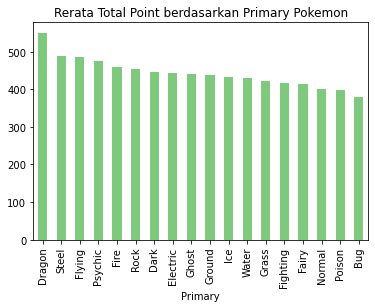

In [336]:
df.groupby('Primary')['Total Point'].mean().sort_values(ascending=False).plot(kind='bar',stacked=False, colormap='Accent', title='Rerata Total Point berdasarkan Primary Pokemon') #Plot Bar untuk visualisasi rerata Total Point 

Data yang tersaji dalam plot diatas menunjukkan Pokemon dengan Primary Dragon memiliki rerata Total Point tertinggi disusul oleh Steel & Flying.\
Pokemon dengan Primary Bug memiliki rerata Total Point terendah.

<AxesSubplot:title={'center':'Minimum HP berdasarkan Primary Pokemon'}, xlabel='Primary'>

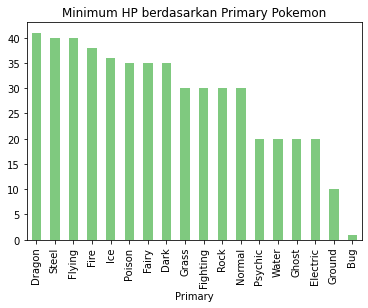

In [337]:
df.groupby('Primary')['HP'].min().sort_values(ascending=False).plot(kind='bar',stacked=False, colormap='Accent', title='Minimum HP berdasarkan Primary Pokemon')#Plot bar berdasar minimum HP berdasar Primary 

Data yang tersaji dalam plot diatas menunjukkan Pokemon Dragon memiliki minimal HP tertinggi diantara Primary Pokemon yang lain. \
Pokemon dengan Primary Bug minimal memiliki HP paling rendah.

# Kesimpulan

Setelah melakukan explorasi & analisi diatas, dapat ditarik beberapa analisis.
-Jumlah Populasi Pokemon ialah 800, terdapat 65 Pokemon Legendary. \
-Pokemon dengan Total Point terbanyak yakni RayquazaMega Rayquaza dengan Total Point 780 \
-Pokemon Legendary memiliki rerata, minimum, dan maximum Total Point lebih tinggi dibanding Pokemon non Legendary \
-Pokemon dengan Primary Dragon memiliki minimum HP tertinggi & rerata Total Point tertinggi

Saya menyarankan untuk menyiapkan deck berisi Pokemon dengan Primary Dragon & menghindari Pokemon dengan Primary Bug